# Homework 09
This homework is based on the classification and regression lectures.

In [76]:
library(tidyverse)
library(ggplot2)
library(dplyr)
#install.packages("glmnet")
library(glmnet)
suppressPackageStartupMessages(library(glmnet))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(tidyverse))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("glmnet"):
“installation of package ‘glmnet’ had non-zero exit status”


## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula.

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | converts each category into a separate binary (0/1) column |
| **Feature selection*** | the process of choosing a subset of relevant features that contribute most to the predictive power of a model |
| **Classifier** | mocel that assigns inputs to categories(classes) instead of predicting the numeric value |
| **Precision** | (true positives)/(true positives + false positives) |
| **Recall** | (true positives)/(true positives + false negatives) |
| **F1 Score** | 2((precision*recall)/(precision+recall)) |
| **Parsimonious model** | A model that explains the data well while using as few parameters as possible. |
| **Ridge regression** | Statistical technique that adds a penalty to the standard linear regression model.  |
| **LASSO regression** | It forces the coeffient to 0 one at a timerather than constraining the total coefficent. |
| **Cross validation** | It compares models fairly by addressing the randomness of the train/test split. |
| **Tree based methods** | It recursively partions the feature space into smaller regions to make a final prediction. |

*Just give the general idea.

## Question 2
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
**A perfect classifer on the ROC curve will look like a rectangle and a bad classifier looks luke the line y=x.**
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?
**When the F1 score is close to 1 it indicates that both the precision and recall is high. If the F1 score is close to 0 then either the precision, recall or both will be low. Essentially it excels in one metric and then fails in the other.**

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | straight line | sigmoid/logit curve |
| **Dependent Variable Type** | continous/numerical | dichotomous/categorical |
| **Purpose** (regression or classification) | regression | classification |
| **Range of output variable** ($y_i$ or $p_i$) | real numbers | [0,1] |
| **Method*** | Ordinary Least Squares (OLS) | Maximum Likelihood estimatic |
| **Example of use** |  |  |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

**It is important to train then test the model because it allows for generalization of the model to new and unseen data. To do this, a portion of the dataset is set aside as the test data and then the rest is used for training. This allows us to test the model's accuracy on the new data and make sure that it was not being used to evaluate the model.***

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [77]:
housing <- read_csv("housing.csv")
summary(housing)

Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

**Linear regression is appropriate since the outcome of median
house value is continuous and has many numeric predictors.**

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [78]:
#scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

house_num <- housing |>
  select(where(is.numeric)) |>
  mutate(across(where(is.numeric), scale))

#split data 75/25 training/test
set.seed(123)
train <- runif(nrow(house_num)) < 0.75
test <- !train

#### c) Fit the model.

In [79]:
f = median_house_value ~longitude + latitude + housing_median_age +
  total_rooms + population + households + median_income
m <- lm(f, data=house_num %>% filter(train))
summary(m)


Call:
lm(formula = f, data = house_num %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

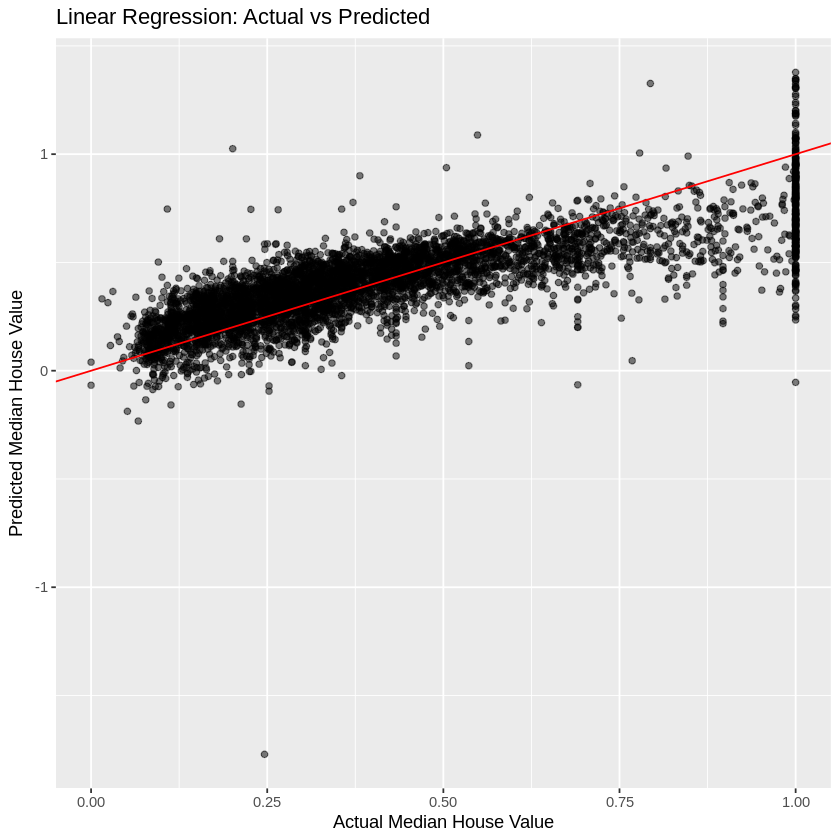

In [80]:
#prediction
house <- house_num |>
  filter(test)

house <- house |>
  mutate(median_house_val_pred = predict(m, house %>% as.data.frame()))

ggplot(house, aes(median_house_value, median_house_val_pred)) +
geom_point(alpha = 0.5) +
geom_abline(slope = 1, intercept = 0, color = "red") +
labs(title = "Linear Regression: Actual vs Predicted",
x = "Actual Median House Value",
y = "Predicted Median House Value")

#### e) Make a residuals plot.

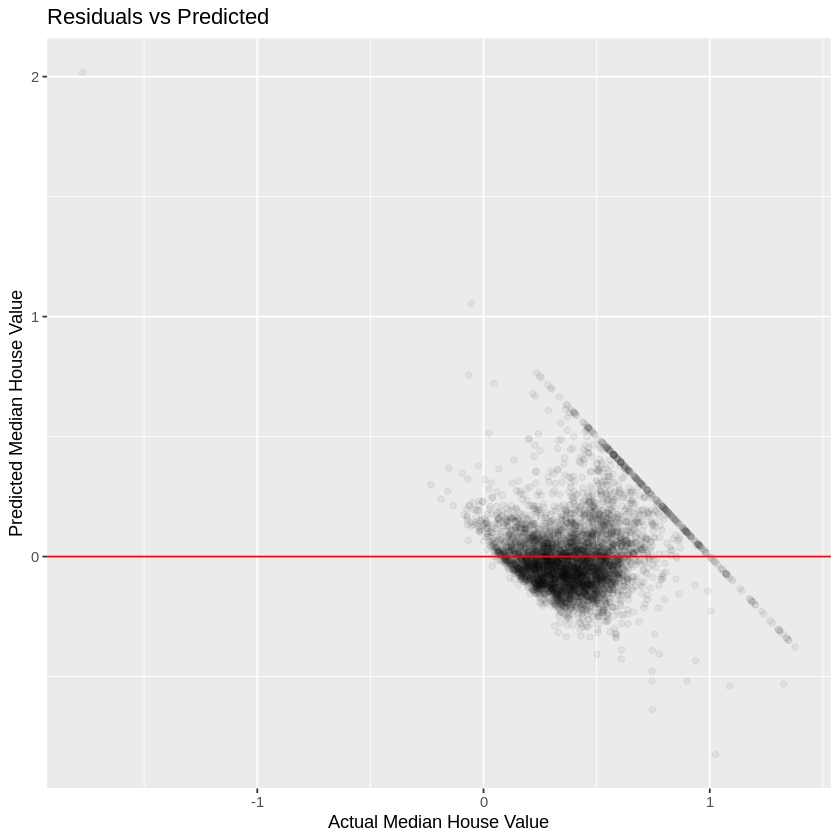

In [81]:
ggplot(house, aes(x = median_house_val_pred,y = median_house_value - median_house_val_pred)) +
  geom_point(alpha = 0.05) +
  geom_hline(yintercept = 0, color="red") +
  labs(title = "Residuals vs Predicted",
        x = "Actual Median House Value",
        y = "Predicted Median House Value")


## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables.
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [82]:
diabetes <- read_csv("diabetes.csv")
summary(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

**Logistic regression is appropriate since the outcome is binary.**

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [83]:
#scale
scale <- function(a){
(a - min(a))/(max(a)-min(a))
}

diabetes_scale <- diabetes %>% select(where(is.numeric)) %>%
mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
n <- nrow(diabetes_scale)
train_idx <- sample.int(n, size = floor(0.1 * n))
d_train <- diabetes_scale |>
  slice(train_idx)
d_test <- diabetes_scale |>
  slice(setdiff(seq_len(n), train_idx))

d_train |>
  write_csv("diabetes_train.csv")
d_test |>
  write_csv("diabetes_test.csv")

#### c) Fit the model.

In [84]:
f <- Outcome ~ .
m <- glm(f, data = d_train, family = binomial())
summary(m)


Call:
glm(formula = f, family = binomial(), data = d_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.2848     2.3250  -3.563 0.000366 ***
Pregnancies                1.8716     1.5354   1.219 0.222848    
Glucose                    5.0362     2.1896   2.300 0.021446 *  
BloodPressure              0.2239     2.3883   0.094 0.925307    
SkinThickness              1.4403     2.3091   0.624 0.532776    
Insulin                   -1.2769     2.0595  -0.620 0.535259    
BMI                        7.2613     4.2227   1.720 0.085507 .  
DiabetesPedigreeFunction   0.7208     1.9228   0.375 0.707739    
Age                        1.0054     1.8917   0.531 0.595091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Number of Fisher Sc

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy.

In [85]:
p <- predict(m, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value = c(tp, fp, tn, fn, acc)
)

df

measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

[1] 0.05480833

9 x 1 sparse Matrix of class "dgCMatrix"
                         lambda.min
(Intercept)               -4.653919
Pregnancies                1.073443
Glucose                    3.455152
BloodPressure              .       
SkinThickness              .       
Insulin                    .       
BMI                        3.507260
DiabetesPedigreeFunction   .       
Age                        .       

measure,value
<chr>,<dbl>
True Positive,120.0000000
False Positive,31.0000000
True Negative,420.0000000
False Negative,121.0000000
Accuracy,0.7803468


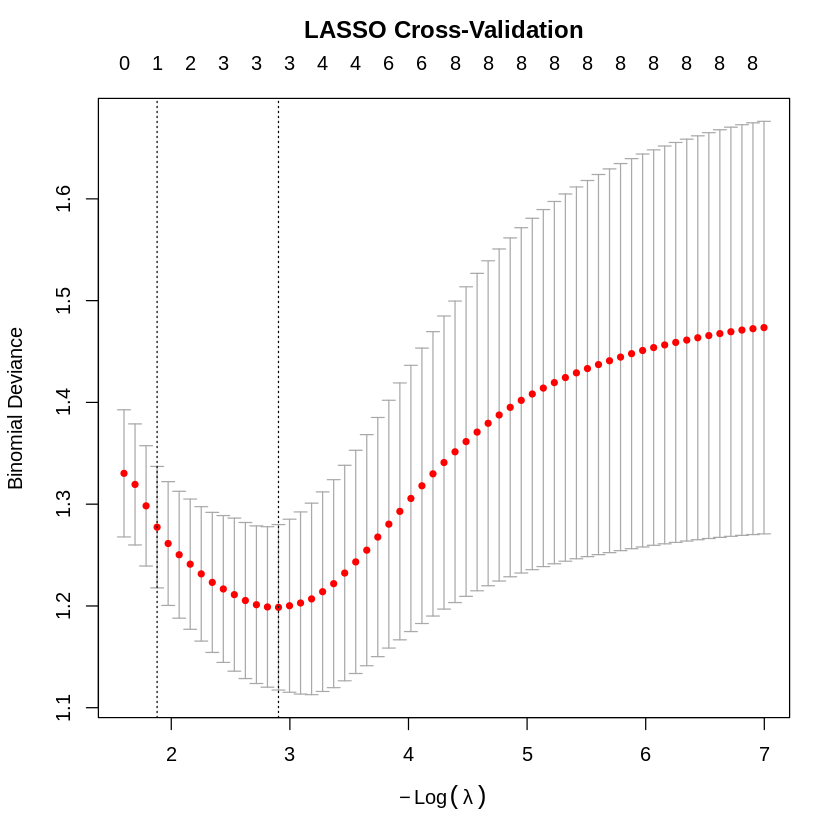

In [86]:
# convert data frames to matrices
x_train <- model.matrix(Outcome ~ ., d_train)[, -1]
y_train <- d_train$Outcome
x_test <- model.matrix(Outcome ~ ., d_test)[, -1]
y_test <- d_test$Outcome

# fit LASSO logistic regression (alpha = 1)
set.seed(123)
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1, family = "binomial")

# cross-validation curve
plot(cv_lasso)
title("LASSO Cross-Validation", line = 2.5)

# best lambda value
cv_lasso$lambda.min

# coefficients at best lambda
coef(cv_lasso, s = "lambda.min")

# predict on test data
lasso_pred_prob <- predict(cv_lasso, newx = x_test, s = "lambda.min", type = "response")
lasso_pred <- as.integer(lasso_pred_prob >= 0.5)

# performance metrics
tp <- sum(lasso_pred == 1 & y_test == 1)
fp <- sum(lasso_pred == 1 & y_test == 0)
tn <- sum(lasso_pred == 0 & y_test == 0)
fn <- sum(lasso_pred == 0 & y_test == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

tibble(
measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
value = c(tp, fp, tn, fn, acc))


#### f) Make a plot of actual vs. predicted values for the LASSO model.

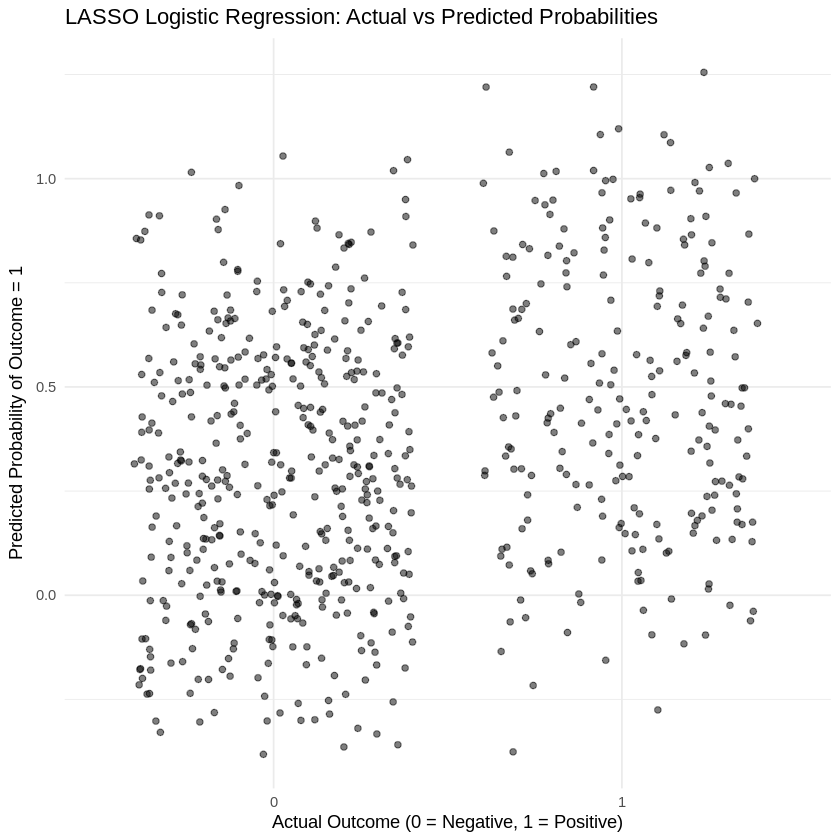

In [87]:
# predicted prob matrix to numeric
pred_vec <- as.numeric(lasso_pred_prob)

#data frame for plotting
plot_data <- tibble(
  actual = y_test,
  predicted = pred_vec
)

# actual vs predicted probability
ggplot(plot_data, aes(x = factor(actual), y = predicted)) +
  geom_jitter(height = 0.5, alpha = 0.5) +
  labs(
    title = "LASSO Logistic Regression: Actual vs Predicted Probabilities",
    x = "Actual Outcome (0 = Negative, 1 = Positive)",
    y = "Predicted Probability of Outcome = 1"
  ) +
    theme_minimal()
